In [50]:
import pandas as pd
import numpy as np

import seaborn as sns
import sklearn

import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
from sklearn import datasets

iris_data = datasets.load_iris()

# iris_data.target_names
# iris_data.data
# iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [109]:
from sklearn.cross_validation import train_test_split

# sklearn.random_projection?


arr =  [1, 2, 3, 4, 5, 5, 6]

# Standard scaler

sklearn.preprocessing.StandardScaler

sklearn.preprocessing


X = iris_data.data
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

def knn(k=5):
    knn_classif = KNeighborsClassifier(k)
    knn_classif.fit(X_train, y_train)
    return knn_classif.score(X_test, y_test)

k: 1 => 0.911
k: 2 => 0.911
k: 3 => 0.956
k: 4 => 0.956
k: 5 => 0.978
k: 6 => 0.956
k: 7 => 0.978
k: 8 => 0.956
k: 9 => 0.956
k: 10 => 0.956
k: 11 => 0.978
k: 12 => 0.978
k: 13 => 0.978
k: 14 => 0.956
k: 15 => 0.978
k: 16 => 0.956
k: 17 => 0.956
k: 18 => 0.889
k: 19 => 0.911
k: 20 => 0.911
k: 21 => 0.911
k: 22 => 0.889
k: 23 => 0.889
k: 24 => 0.889
k: 25 => 0.911
k: 26 => 0.889
k: 27 => 0.911
k: 28 => 0.889
k: 29 => 0.911
k: 30 => 0.911
k: 31 => 0.911
k: 32 => 0.889
k: 33 => 0.889
k: 34 => 0.867
k: 35 => 0.867
k: 36 => 0.867
k: 37 => 0.867
k: 38 => 0.867
k: 39 => 0.867
k: 40 => 0.867
k: 41 => 0.867
k: 42 => 0.867
k: 43 => 0.867
k: 44 => 0.867
k: 45 => 0.867
k: 46 => 0.867
k: 47 => 0.867
k: 48 => 0.867
k: 49 => 0.867
k: 50 => 0.867
k: 51 => 0.867
k: 52 => 0.867
k: 53 => 0.867
k: 54 => 0.867
k: 55 => 0.867
k: 56 => 0.867
k: 57 => 0.867
k: 58 => 0.867
k: 59 => 0.867
k: 60 => 0.867
k: 61 => 0.867
k: 62 => 0.800
k: 63 => 0.844
k: 64 => 0.711
k: 65 => 0.778
k: 66 => 0.222
k: 67 => 0.222
k: 6

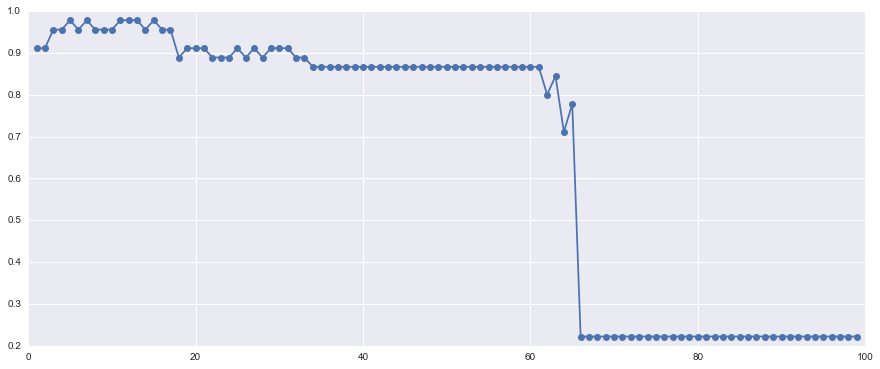

In [61]:
for k in range(1, 100):
    print "k: %i => %0.3f" % (k, knn(k))
    
scores = [knn(k) for k in range(1, 100)]

plt.figure(figsize=(15, 6))
plt.plot(range(1, 100), scores, '-o')

In [89]:
from sklearn.cross_validation import KFold

arr = np.array(range(1, 20))

kf = KFold(len(arr), n_folds = 5)

len(kf)

i = 1
for train_idx, test_idx in kf:
    print "FOLD: ", i
    
    print "Training indices", train_idx
    print "Testing indices", test_idx
    print
    i += 1

FOLD:  1
Training indices [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Testing indices [0 1 2 3]

FOLD:  2
Training indices [ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18]
Testing indices [4 5 6 7]

FOLD:  3
Training indices [ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18]
Testing indices [ 8  9 10 11]

FOLD:  4
Training indices [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18]
Testing indices [12 13 14 15]

FOLD:  5
Training indices [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Testing indices [16 17 18]



In [108]:
from sklearn.grid_search import GridSearchCV

kf = KFold(len(X), n_folds = 10)

k_values = range(2, 100)


k_parameters = {
    'n_neighbors': k_values,
    'weights': ['uniform', 'distance']
}

gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=k_parameters, cv=kf)

gs.fit(X, y)

# print gs.grid_scores_
print gs.best_params_



{'n_neighbors': 2, 'weights': 'distance'}
